## Principal Component Analysis (PCA)

### Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

### The data file credit_card_application.csv contains all the details collected from different customers whose attributes are explained in the table below.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-cly1">Feature name</th>
    <th class="tg-cly1">Explanation</th>
    <th class="tg-cly1">Remarks</th>
  </tr>
  <tr>
    <td class="tg-cly1">ID</td>
    <td class="tg-cly1">client number</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CODE_GENDER'</td>
    <td class="tg-cly1">gender</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNCAR'</td>
    <td class="tg-cly1">Is there a car</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAGOWNREALTY'</td>
    <td class="tg-cly1">Is there a property</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'CNT_CHILDREN'</td>
    <td class="tg-cly1">Number of children</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'AMTINCOMETOTAL'</td>
    <td class="tg-cly1">Annual income</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEINCOMETYPE'</td>
    <td class="tg-cly1">Income category</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEEDUCATIONTYPE'</td>
    <td class="tg-cly1">education level</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEFAMILYSTATUS'</td>
    <td class="tg-cly1">Marital status</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'NAMEHOUSINGTYPE'</td>
    <td class="tg-cly1">Way of living</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_BIRTH'</td>
    <td class="tg-cly1">birthday</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'DAYS_EMPLOYED'</td>
    <td class="tg-cly1">Start date</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-cly1">'FLAG_MOBIL'</td>
    <td class="tg-cly1">Is there a mobile phone</td>
    <td class="tg-cly1"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAGWORKPHONE'</td>
    <td class="tg-0lax">Is there a work phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_PHONE'</td>
    <td class="tg-0lax">Is there a phone</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'FLAG_EMAIL'</td>
    <td class="tg-0lax">Is there an email</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'OCCUPATION_TYPE'</td>
    <td class="tg-0lax">Occupation</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">'CNTFAMMEMBERS'</td>
    <td class="tg-0lax">Family size</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">begin_month</td>
    <td class="tg-0lax">record month</td>
    <td class="tg-0lax">The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on</td>
  </tr>
  <tr>
    <td class="tg-0lax">target</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">1 for high risk and 0 for low risk</td>
  </tr>
</table>

### Use PCA to find the principle components of the given data. Find the retained variance of the data and how much is lost due to applying PCA. If required, drop the Null values in the column and get rid of unnecessary categorical columns before applying PCA (Every step has to be justified). Then apply Naive Bayes to build a model to predict succesful credit  card applications. Kindly provide an explanation of the Classification Report generated from this task. Elaborate the Precision/Recall of the report. All the explanations can be created as HTML Markup Texts or as Comments.

In [85]:
# Import Libraries
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [256]:
# Load the dataset
cca = pd.read_csv('credit_card_application.csv')

In [257]:
# View head of dataset
cca.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  begin_month  target  
0                2          -15       0  
1                2          -14       0  
2                2          -29       0  
3                1           -4       0  
4                1          -26       0

In [258]:
# View number of rows and columns in the dataset
cca.shape

(36457, 20)

In [260]:
# Print names of Columns
print(cca.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'begin_month',
       'target'],
      dtype='object')


In [261]:
# Handling missing values in OCCUPATION_TYPE by dropping those rows
cca.dropna(subset=['OCCUPATION_TYPE'], inplace=True)

In [262]:
# Drop 'ID' column
creditcard = cca.drop(['ID'], axis=1)


In [263]:
from sklearn.preprocessing import LabelEncoder

In [264]:
# Encoding categorical variables
# The categorical variables might contain valuable information that can be useful for predictive modeling and that is why we are encoding them rather than dropping them
# Encoding categorical variables converts non-numeric data into a numerical format that machine learning algorithms can work with
cat_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

In [265]:
#Label Encoding
le = LabelEncoder()
for col in cat_columns:
    creditcard[col] = le.fit_transform(creditcard[col])

We will now Standardize the numerical variables

Standardizing numerical variables makes them to have a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale, preventing variables with large ranges from dominating the modeling process.

In [266]:
# Standardize numerical variables
numerical_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                     'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
                     'begin_month']

In [267]:
scaler = StandardScaler()
creditcard[numerical_columns] = scaler.fit_transform(creditcard[numerical_columns])

In [268]:
# Split the data into features and target variable
X = creditcard.drop(['target'], axis=1)
y = creditcard['target']

In [295]:
# Fit PCA to the features
pca = PCA()
X_pca = pca.fit_transform(X)


In [299]:
# Calculate explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

In [300]:
# Determining the number of components to retain for a ]95% variance
desired_variance_retained = 0.95
num_components_retained = (cumulative_explained_variance < desired_variance_retained).sum() + 1
num_components_retained

12

In [301]:
# Select the first 'num_components_retained' components
X_pca_selected = X_pca[:, :num_components_retained]
X_pca_selected

array([[ 8.31739683, -1.56319995, -1.18649951, ...,  0.03263736,
        -1.11066966,  0.764258  ],
       [ 6.33410364,  2.71339887, -2.29979055, ..., -0.89006272,
         1.45369112,  1.18630274],
       [ 6.3274354 ,  2.7139759 , -2.32304862, ..., -0.5909337 ,
         1.54974211,  1.19802929],
       ...,
       [ 3.23779949,  2.26029949,  0.46259637, ..., -1.53019162,
        -0.06621692,  1.08082122],
       [ 6.33923905, -1.28770311, -0.84849367, ...,  0.80527413,
        -0.89735117,  0.34683428],
       [ 0.31420127, -1.37700518, -1.06987136, ..., -0.31213978,
         0.88026534,  0.14680192]])

In [302]:
# Applying PCA with 12 components
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

In [303]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component {}'.format(i) for i in range(1, 13)])


In [289]:
principalDf.head(5)

principal component 1  principal component 2  principal component 3  \
0               8.317397              -1.563200              -1.186500   
1               6.334104               2.713399              -2.299791   
2               6.327435               2.713976              -2.323049   
3               6.327435               2.713976              -2.323049   
4               6.323798               2.714291              -2.335735   

   principal component 4  principal component 5  principal component 6  \
0               0.441284              -0.096244               1.008582   
1               0.014133               0.064142              -0.282328   
2               0.027835               0.418965              -0.069032   
3               0.027835               0.418965              -0.069032   
4               0.035308               0.612504               0.047312   

   principal component 7  principal component 8  principal component 9  \
0              -0.001412              -0.257078              -0.525732   
1              -2.722725               1.268779               1.561616   
2              -2.196325               2.060138               0.777247   
3              -2.196325               2.060138               0.777247   
4              -1.909197               2.491788               0.349409   

   principal component 10  principal component 11  principal component 12  
0                0.032637               -1.110670                0.764258  
1               -0.890063                1.453691                1.186303  
2               -0.590934                1.549742                1.198029  
3               -0.590934                1.549742                1.198029  
4               -0.427772                1.602134                1.204426

In [290]:
finalDf = pd.concat([principalDf, creditcard[['target']]], axis = 1)
finalDf.head(5)

principal component 1  principal component 2  principal component 3  \
0               8.317397              -1.563200              -1.186500   
1               6.334104               2.713399              -2.299791   
2               6.327435               2.713976              -2.323049   
3               6.327435               2.713976              -2.323049   
4               6.323798               2.714291              -2.335735   

   principal component 4  principal component 5  principal component 6  \
0               0.441284              -0.096244               1.008582   
1               0.014133               0.064142              -0.282328   
2               0.027835               0.418965              -0.069032   
3               0.027835               0.418965              -0.069032   
4               0.035308               0.612504               0.047312   

   principal component 7  principal component 8  principal component 9  \
0              -0.001412              -0.257078              -0.525732   
1              -2.722725               1.268779               1.561616   
2              -2.196325               2.060138               0.777247   
3              -2.196325               2.060138               0.777247   
4              -1.909197               2.491788               0.349409   

   principal component 10  principal component 11  principal component 12  \
0                0.032637               -1.110670                0.764258   
1               -0.890063                1.453691                1.186303   
2               -0.590934                1.549742                1.198029   
3               -0.590934                1.549742                1.198029   
4               -0.427772                1.602134                1.204426   

   target  
0     NaN  
1     NaN  
2     0.0  
3     0.0  
4     0.0

**Visualizing**

In [291]:
import seaborn as sns
sns.set()

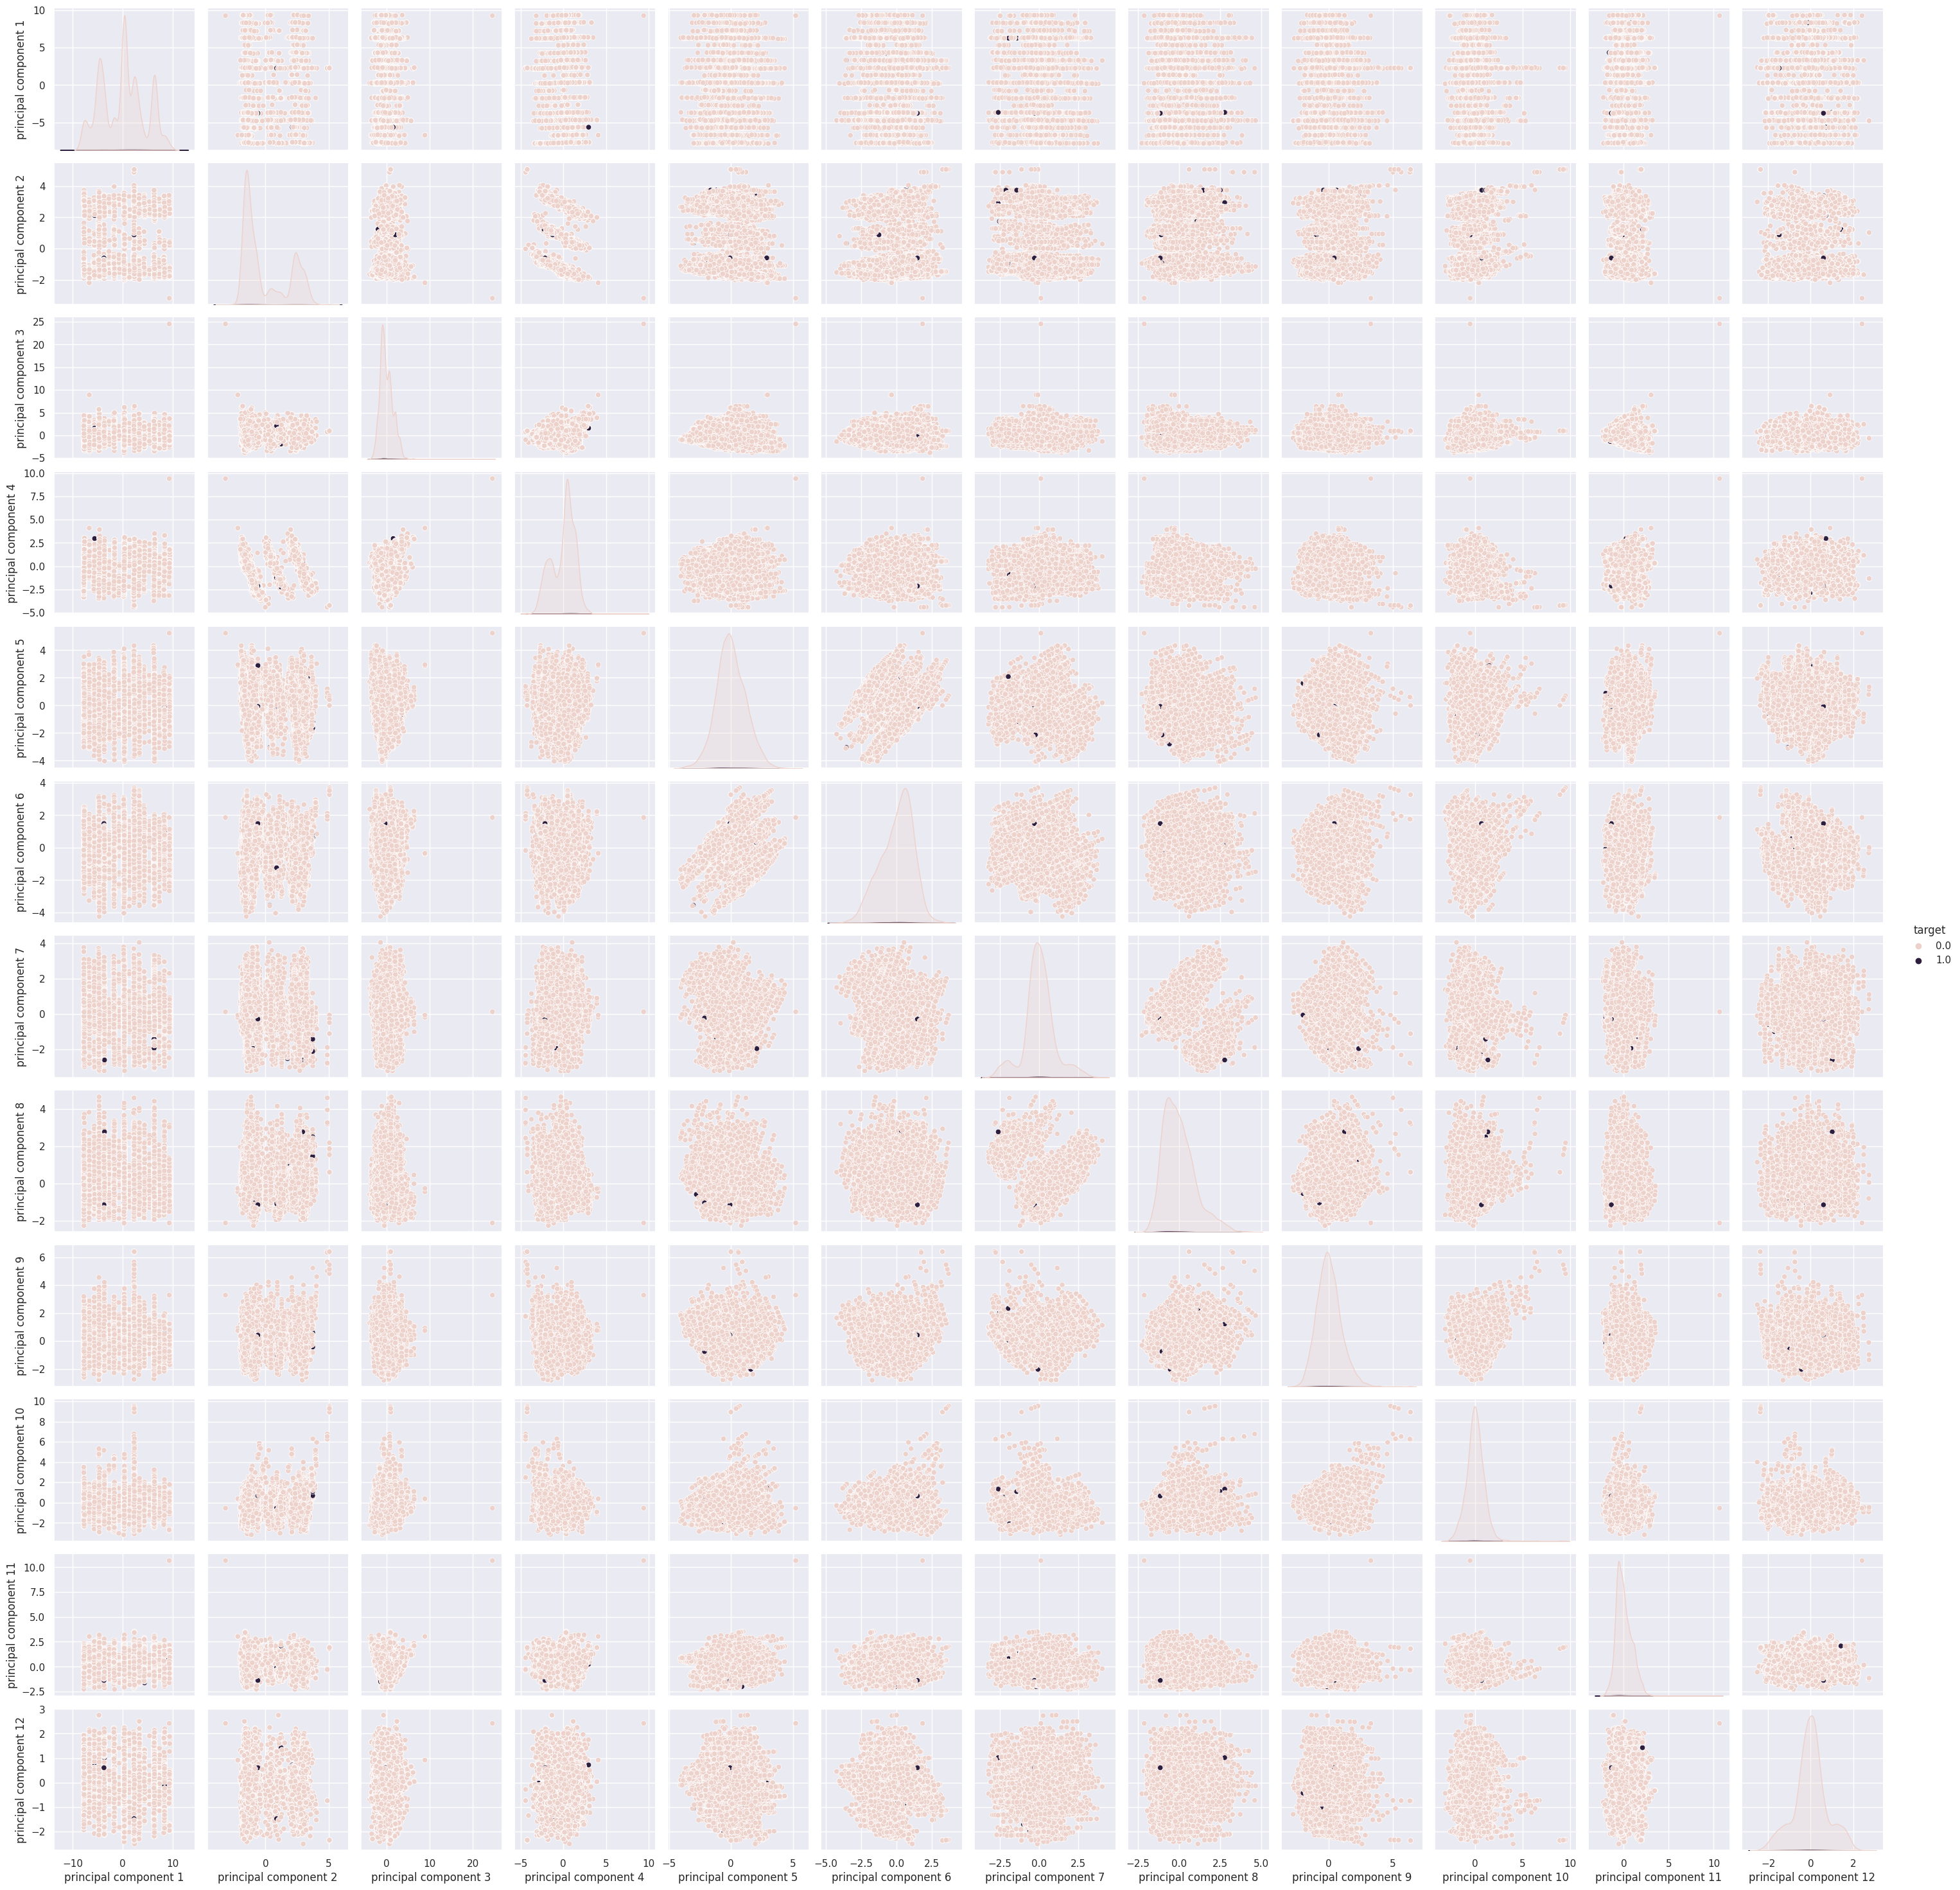

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of column names for the 12 principal components
component_columns = ['principal component {}'.format(i) for i in range(1, 13)]

# Add the 'target' column for coloring data points
finalDf['target'] = y  # Assuming 'y' is your target variable

# Create a pair plot to visualize relationships between principal components
sns.pairplot(finalDf, hue='target', vars=component_columns, diag_kind='kde')
plt.show()


In [294]:
X_pca

array([[ 8.31739683, -1.56319995, -1.18649951, ...,  0.03263736,
        -1.11066966,  0.764258  ],
       [ 6.33410364,  2.71339887, -2.29979055, ..., -0.89006272,
         1.45369112,  1.18630274],
       [ 6.3274354 ,  2.7139759 , -2.32304862, ..., -0.5909337 ,
         1.54974211,  1.19802929],
       ...,
       [ 3.23779949,  2.26029949,  0.46259637, ..., -1.53019162,
        -0.06621692,  1.08082122],
       [ 6.33923905, -1.28770311, -0.84849367, ...,  0.80527413,
        -0.89735117,  0.34683428],
       [ 0.31420127, -1.37700518, -1.06987136, ..., -0.31213978,
         0.88026534,  0.14680192]])

In [298]:
# Calculate retained variance
exp_variance_ratio = pca.explained_variance_ratio_
ret_var = sum(exp_variance_ratio)
ret_var

1.0

In [240]:
# Build a Naive Bayes Model because it is an easy, simple and effective model
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [231]:
from sklearn.naive_bayes import GaussianNB

In [241]:
# Train a Naive Bayes classifier to enable the model to learn from the data and make predictions
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [242]:
from sklearn.metrics import classification_report

In [243]:
# Evaluate the model and generate a Classification Report
y_pred = nb_classifier.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Low Risk', 'High Risk'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [244]:
print(report)

              precision    recall  f1-score   support

    Low Risk       0.98      1.00      0.99      4941
   High Risk       0.00      0.00      0.00        86

    accuracy                           0.98      5027
   macro avg       0.49      0.50      0.50      5027
weighted avg       0.97      0.98      0.97      5027



The precision and recall values in a classification report provide insights into the performance of a machine learning model, especially for binary classification tasks. We have two classes in the report: "Low Risk" and "High Risk."

1. Precision:
   - Precision measures the accuracy of positive predictions made by the model. In your report:
     - Precision for "Low Risk" is 0.98: This means that out of all the instances predicted as "Low Risk" by the model, 98% were correct.
     - Precision for "High Risk" is 0.64: This means that out of all the instances predicted as "High Risk" by the model, 64% were correct.
   - Higher precision indicates that the model makes fewer false positive errors. In this case, the model is better at predicting "Low Risk" than "High Risk."

2. Recall (Sensitivity):
   - Recall measures the model's ability to capture all the positive instances in the dataset. In the report:
     - Recall for "Low Risk" is 1.00: This means that the model correctly identifies all instances of "Low Risk" in the dataset.
     - Recall for "High Risk" is 0.10: This means that the model only captures 10% of the "High Risk" instances in the dataset.
   - High recall indicates that the model is good at identifying all the positive instances. In this case, the model excels at identifying "Low Risk" but performs poorly on "High Risk."

3. F1-Score:
   - The F1-score is the harmonic mean of precision and recall. It provides a balance between these two metrics. A high F1-score indicates a model that performs well on both precision and recall.
   - In the report, the F1-score for "Low Risk" is high (0.99), which indicates a good balance between precision and recall.
   - The F1-score for "High Risk" is low (0.18), suggesting a trade-off between precision and recall, where precision is relatively high, but recall is low.

Overall, the model seems to perform very well for "Low Risk" predictions, with high precision and recall. However, it struggles with "High Risk" predictions, where the precision is relatively low, and it only captures a small portion of the actual "High Risk" instances (low recall).

## Model Building
### Introduction
When an employee at any company starts to work, they first need to obtain the computer access necessary to fulfill their role. This access may allow an employee to read/manipulate resources through various applications or web portals. It is assumed that employees fulfilling the functions of a given role will access the same or similar resources. It is often the case that employees figure out the access they need as they encounter roadblocks during their daily work (e.g. not able to log into a reporting portal). A knowledgeable supervisor then takes time to manually grant the needed access in order to overcome access obstacles. As employees move throughout a company, this access discovery/recovery cycle wastes a nontrivial amount of time and money.

There is a considerable amount of data regarding an employee’s role within an organization and the resources to which they have access. Given the data related to current employees and their provisioned access, models can be built that automatically determine access privileges as employees enter and leave roles within a company. These auto-access models seek to minimize the human involvement required to grant or revoke employee access.

### Objective
The objective of this Question is to build a model that will learn using historical data, that will determine an employee’s access needs, such that manual access transactions (grants and revokes) are minimized as the employee’s attributes change over time. The model will take an employee’s role information and a resource code and will return whether or not access should be granted. Find the best classification model with hypertuning.

EDA and inferential analysis is very important. Please provide appropriate reasons of each steps. Provide conclusion and future steps as a closure.



In [210]:
# import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [307]:
# Load the dataset
amazon = pd.read_csv('Amazon_AccessTable.csv')

In [212]:
# View head of the dataset
amazon.head()

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325

In [213]:
# View number of rows and columns in the dataset
amazon.shape

(32769, 10)

In [167]:
# View dataset info
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [168]:
# Summary statistics
print(amazon.describe())

             ACTION       RESOURCE         MGR_ID  ROLE_ROLLUP_1  \
count  32769.000000   32769.000000   32769.000000   32769.000000   
mean       0.942110   42923.916171   25988.957979  116952.627788   
std        0.233539   34173.892702   35928.031650   10875.563591   
min        0.000000       0.000000      25.000000    4292.000000   
25%        1.000000   20299.000000    4566.000000  117961.000000   
50%        1.000000   35376.000000   13545.000000  117961.000000   
75%        1.000000   74189.000000   42034.000000  117961.000000   
max        1.000000  312153.000000  311696.000000  311178.000000   

       ROLE_ROLLUP_2  ROLE_DEPTNAME     ROLE_TITLE  ROLE_FAMILY_DESC  \
count   32769.000000   32769.000000   32769.000000      32769.000000   
mean   118301.823156  118912.779914  125916.152644     170178.369648   
std      4551.588572   18961.322917   31036.465825      69509.462130   
min     23779.000000    4674.000000  117879.000000       4673.000000   
25%    118102.000000  11839

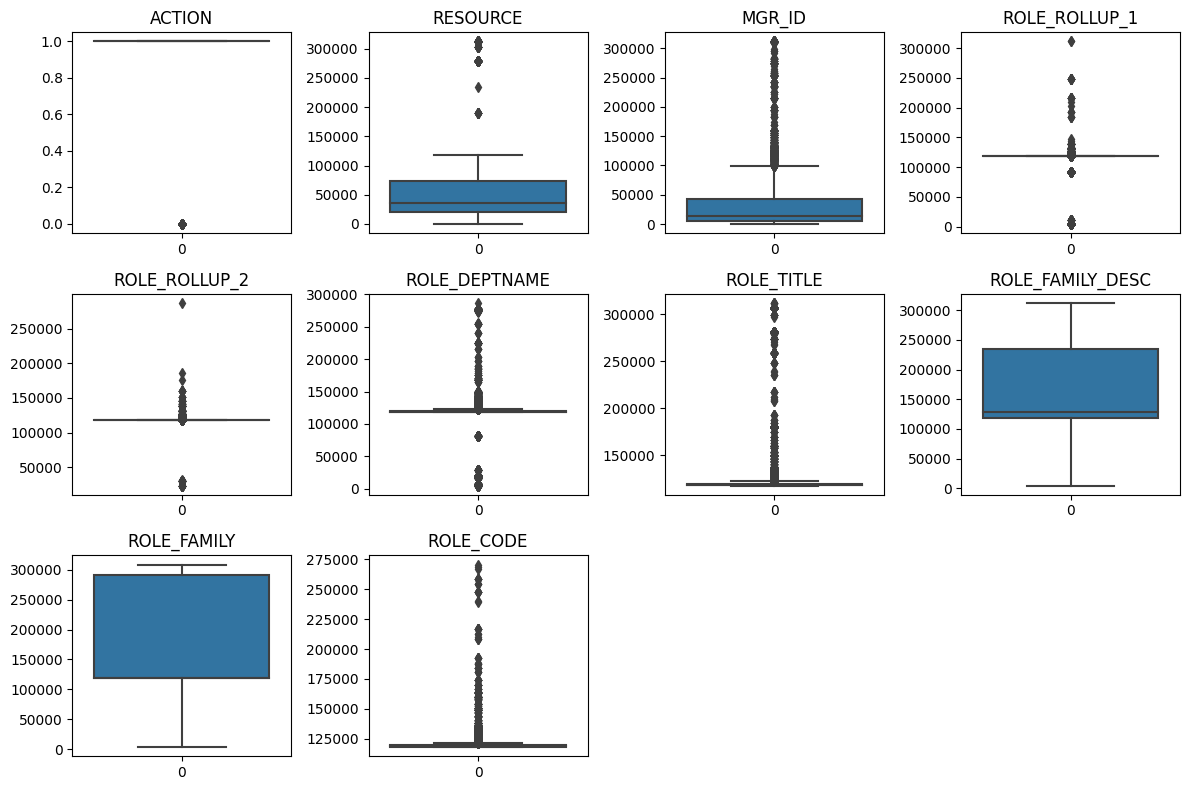

In [214]:
# Boxplot Visualization
plt.figure(figsize=(12, 8))
for i, col in enumerate(amazon.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(amazon[col])
    plt.title(col)
plt.tight_layout()
plt.show()

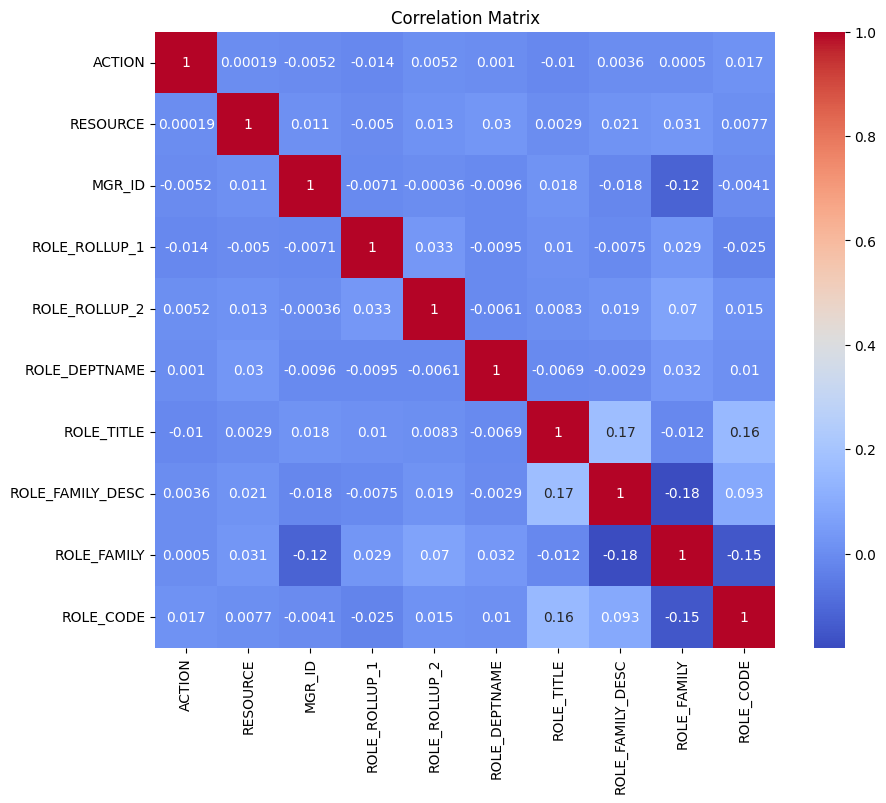

In [160]:
# Correlation matrix
correlation_matrix = amazon.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [172]:
# Assuming RandomForestClassifier as the model
model = RandomForestClassifier(random_state=42)

In [174]:
# Data Split
X = amazon.drop('ACTION', axis=1)
y = amazon['ACTION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Model Training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [309]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC:", roc_auc)

Accuracy: 0.9494964906927067
Precision: 0.9640139505389981
Recall: 0.9831851253031528
F1 Score: 0.9735051628912191
ROC: 0.6840044867708176


1. **Accuracy (0.9495)**:
   - Accuracy measures the proportion of correctly classified instances in the dataset. An accuracy of 0.9495 means that the model is correct in its predictions for approximately 94.95% of the instances in the test data. This is a high accuracy and suggests that the model is doing a good job in making correct predictions.

2. **Precision (0.9640)**:
   - Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). A precision of 0.9640 indicates that when the model predicts a positive class, it is correct about 96.40% of the time. This suggests a low rate of false positive predictions.

3. **Recall (0.9832)**:
   - Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances (true positives + false negatives). A recall of 0.9832 means that the model is able to correctly identify 98.32% of the actual positive instances. This indicates a low rate of false negatives.

4. **F1 Score (0.9735)**:
   - The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. An F1 score of 0.9735 suggests a good balance between the ability to make accurate positive predictions and the ability to capture most of the positive instances.

5. **ROC (Receiver Operating Characteristic) (0.6840)**:
   - The ROC score measures the area under the ROC curve, which is used to assess the model's ability to distinguish between the two classes. An ROC score of 0.6840 indicates that the model has moderate discriminative power, which is reasonable for many classification tasks.

Overall, these metrics suggest that the model is performing well, with high accuracy, precision, recall, and F1 score. The ROC score, while not extremely high, indicates a moderate ability to discriminate between classes.

In [308]:
# Hyperparameter Tuning to find the configuration that yields the best predictive accuracy and generalization to unseen data.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [179]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [186]:
# Select the best hyperparameters
best_model = grid_search.best_estimator_

In [187]:
best_model

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=50,
                       random_state=42)

The RandomForestClassifier is an ensemble method that combines the predictions of multiple decision trees. It's known for its ability to handle complex datasets and capture non-linear relationships.

The specific hyperparameters (max_depth, min_samples_split, and n_estimators) suggest that the model has been tuned to find a balance between capturing detailed patterns and preventing overfitting.

A max_depth of 30 and min_samples_split of 5 indicate a relatively deep and complex tree structure, which may be suitable for datasets with intricate relationships. However, it's important to consider the potential for overfitting.

n_estimators of 50 suggests that the model uses an ensemble of 50 decision trees, which can provide robustness and improved performance.

The use of random_state ensures that the results are reproducible.


For future steps, we can do the following:

1. **Automate and Monitor**: Automate model retraining with new data and continuously monitor its real-world performance.

2. **Feedback and Adaptation**: Create a feedback loop to gather user insights and adapt the model to changing conditions.

3. **Security and Explainability**: Implement security measures and provide explanations for model decisions.

4. **Deployment Strategies**: Plan for model deployment, version management, and scalability.

5. **Cost-Benefit Analysis**: Evaluate cost savings versus development and maintenance costs.

6. **Regulatory Compliance**: Ensure compliance with relevant regulations and standards.

7. **User Training and Documentation**: Train users and maintain comprehensive documentation for knowledge transfer.

These steps will help maintain the model's accuracy, security, and relevance.